In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import os
import nltk
from nltk import word_tokenize
from tqdm.auto import tqdm
import shutil

dataset_path = Path('issues.csv.gz')

# download dataset if not already present
if not dataset_path.exists():
    import requests

    with requests.get('https://vps-cd52fe2c.vps.ovh.net/nlp/issues.csv.gz', stream=True) as r:
        content_length = int(r.headers.get("Content-Length"))

        with tqdm.wrapattr(r.raw, 'read', total=content_length, desc='Downloading dataset') as raw:
            with open(dataset_path, 'wb') as f:
                shutil.copyfileobj(raw, f)


df = pd.read_csv(dataset_path)
LANGUAGES = df['language'].unique()


In [20]:
print(LANGUAGES)
df.sample(n=10)


['Python' 'C' 'Javascript' 'Go']


,author,language,text,tokenized_text
131920,justincormack,Go,"Cannot completely, as we need some things they...","[Can, not, completely, ,, as, we, need, some, ..."
33273,JoshData,Python,"Once an alias matches an address, no matter wh...","[Once, an, alias, matches, an, address, ,, no,..."
74796,johnpapa,Javascript,Notice that the func extendExceptionHandler ge...,"[Notice, that, the, func, extendExceptionHandl..."
41787,behdad,C,"For binary GPOS interpolation, as well as for ...","[For, binary, GPOS, interpolation, ,, as, well..."
86491,cowboy,Javascript,"Uses , includes pre-compiled binaries for popu...","[Uses, ,, includes, pre-compiled, binaries, fo..."
111075,cwilso,Javascript,Idea raised by Jennie Delisi in the TPAC sessi...,"[Idea, raised, by, Jennie, Delisi, in, the, TP..."
1423,chiphuyen,Python,I was looking into the data.py and saw that th...,"[I, was, looking, into, the, data.py, and, saw..."
28037,owocki,Python,Welcome to the BIG Gitcoin Grants CLR Round 6 ...,"[Welcome, to, the, BIG, Gitcoin, Grants, CLR, ..."
49328,Maratyszcza,C,"PeachPy doesn't create "".note.GNU-stack"" secti...","[PeachPy, does, n't, create, ``, .note.GNU-sta..."
13161,ymcui,Python,"Hi, The link to SQuAD dev-v2.0.json seems to b...","[Hi, ,, The, link, to, SQuAD, dev-v2.0.json, s..."


In [3]:
df['tokenized_text'] = df['text'].apply(word_tokenize)
df.head()


,author,language,text,tokenized_text
0,llSourcell,Python,I feel like it would be more intuitive if we h...,"[I, feel, like, it, would, be, more, intuitive..."
1,llSourcell,Python,<bountysource-plugin> Want to back this issue?...,"[<, bountysource-plugin, >, Want, to, back, th..."
2,llSourcell,Python,@solaris33 game doesn't show up in the noteboo...,"[@, solaris33, game, does, n't, show, up, in, ..."
3,llSourcell,Python,yay <bountysource-plugin> Want to back this is...,"[yay, <, bountysource-plugin, >, Want, to, bac..."
4,CoreyMSchafer,Python,"Link: Hi There, Your documentation for the new...","[Link, :, Hi, There, ,, Your, documentation, f..."


## Average text length

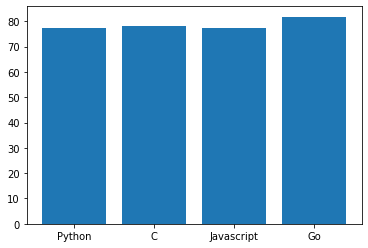

In [4]:
df['length'] = df['tokenized_text'].apply(len)

means = [np.mean(df[df['language'] == lang]['length']) for lang in LANGUAGES]

widths = [1, 2, 3, 4]
plt.bar(widths, means, tick_label=LANGUAGES, width=0.8)
plt.show()


## Average lexical diversity

How diverse is vocabulary of a single entry?

In [5]:
def lexical_diversity(text):
    return len(set(text)) / len(text)


def percentage(count, total):
    return 100 * count / total


In [6]:
df['lex_div'] = df['text'].apply(lexical_diversity)


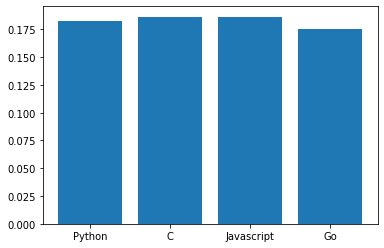

In [7]:
means = [np.mean(df[df['language'] == lang]['lex_div']) for lang in LANGUAGES]

plt.bar(widths, means, tick_label=LANGUAGES, width=0.8)
plt.show()


## Total lexical diversity

How all enries are similar to each other?

In [8]:
whole = [' '.join(df[df['language'] == lang]['text']) for lang in LANGUAGES]


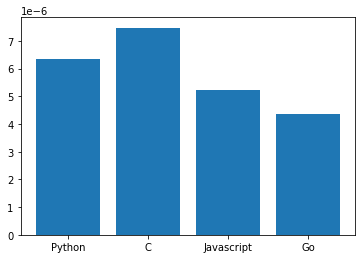

In [9]:
divs = [lexical_diversity(x) for x in whole]
plt.bar(widths, divs, tick_label=LANGUAGES, width=0.8)
plt.show()


## Average word length

In [10]:
def average(words):
    return (sum(len(word) for word in words) / len(words))


In [11]:
df['word_length'] = df['tokenized_text'].apply(average)


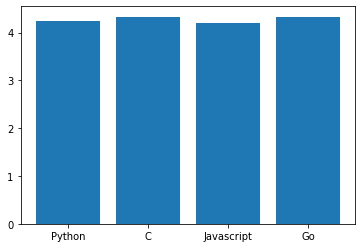

In [12]:
means = [np.mean(df[df['language'] == lang]['word_length'])
         for lang in LANGUAGES]
plt.bar(widths, means, tick_label=LANGUAGES, width=0.8)
plt.show()


## Count of words over 10 characters

In [13]:
def words_over_10(words):
    sum = 0
    for word in words:
        if len(word) >= 10:
            sum += 1
    return sum


In [14]:
df['long_words'] = df['tokenized_text'].apply(words_over_10)


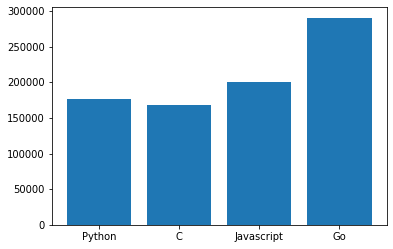

In [15]:
sums = [np.sum(df[df['language'] == lang]['long_words']) for lang in LANGUAGES]
plt.bar(widths, sums, tick_label=LANGUAGES, width=0.8)
plt.show()


## Frequency distribution

In [22]:
from nltk import FreqDist


def get_freq_dist(tokenized_text_series: pd.Series) -> FreqDist:
    return FreqDist(w for text in tokenized_text_series.values for w in text)


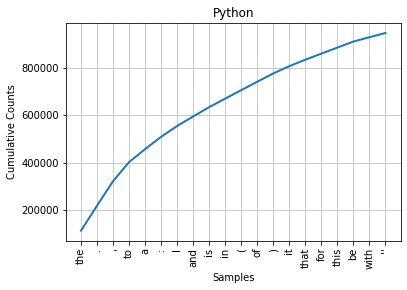

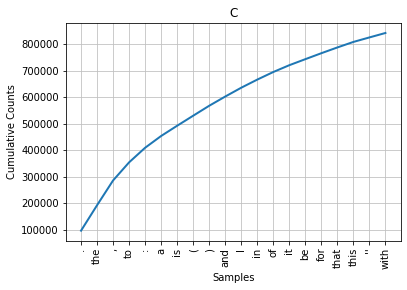

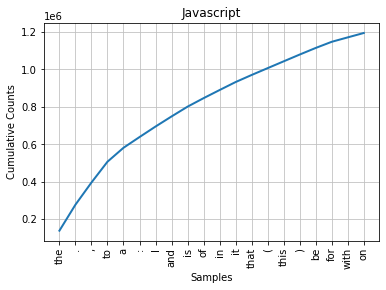

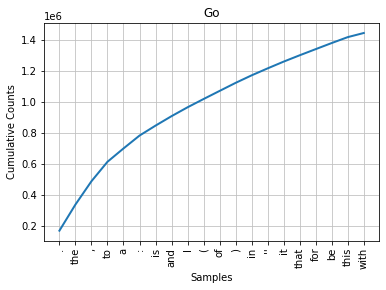

In [36]:
freq_dists = [(lang, get_freq_dist(df[df['language'] == lang]
               ['tokenized_text'])) for lang in LANGUAGES]

for (lang, dist) in freq_dists:
    dist.plot(20, cumulative=True, title=lang)


In [31]:
print(whole[0].split()[100])

great;


In [33]:
len(set(whole[1].split()))

196259

In [35]:
len(set(word_tokenize(whole[1])))


136334